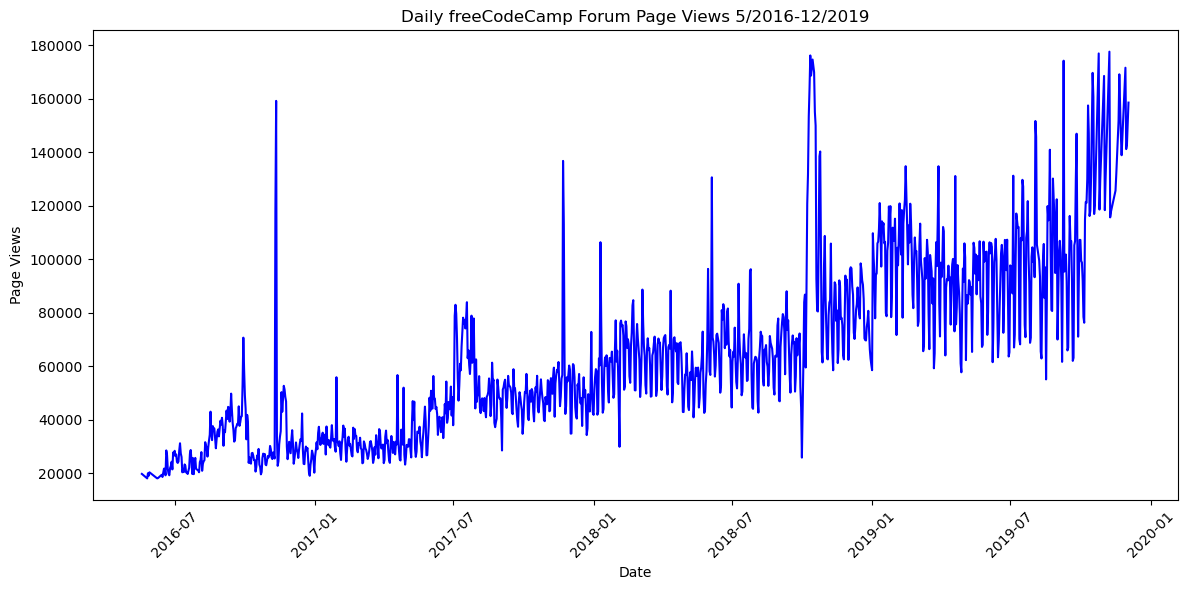

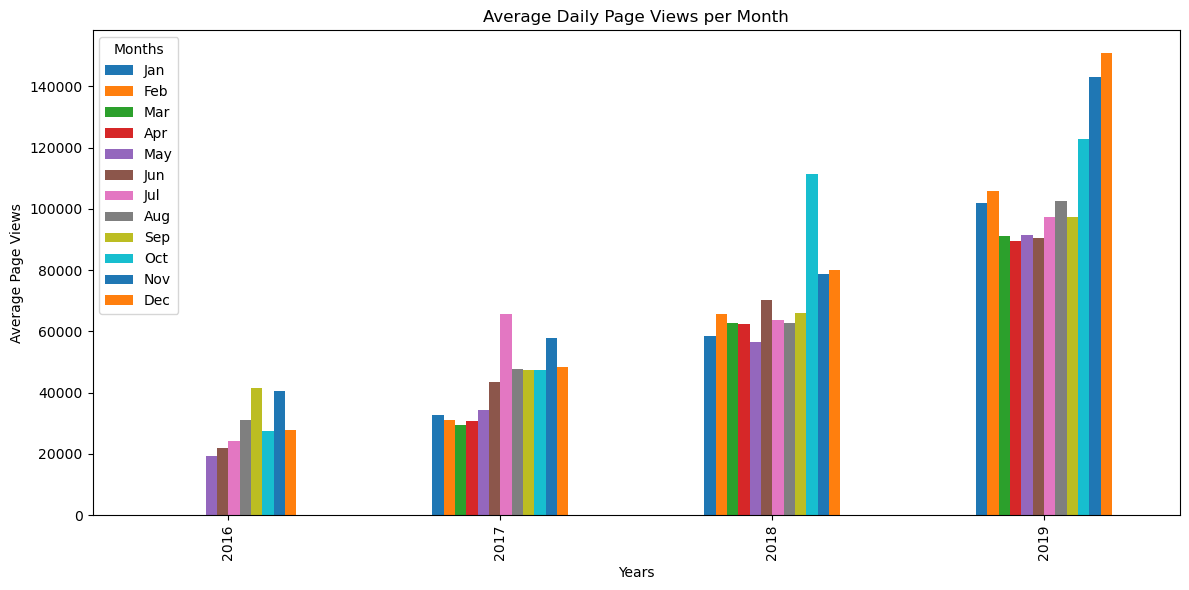

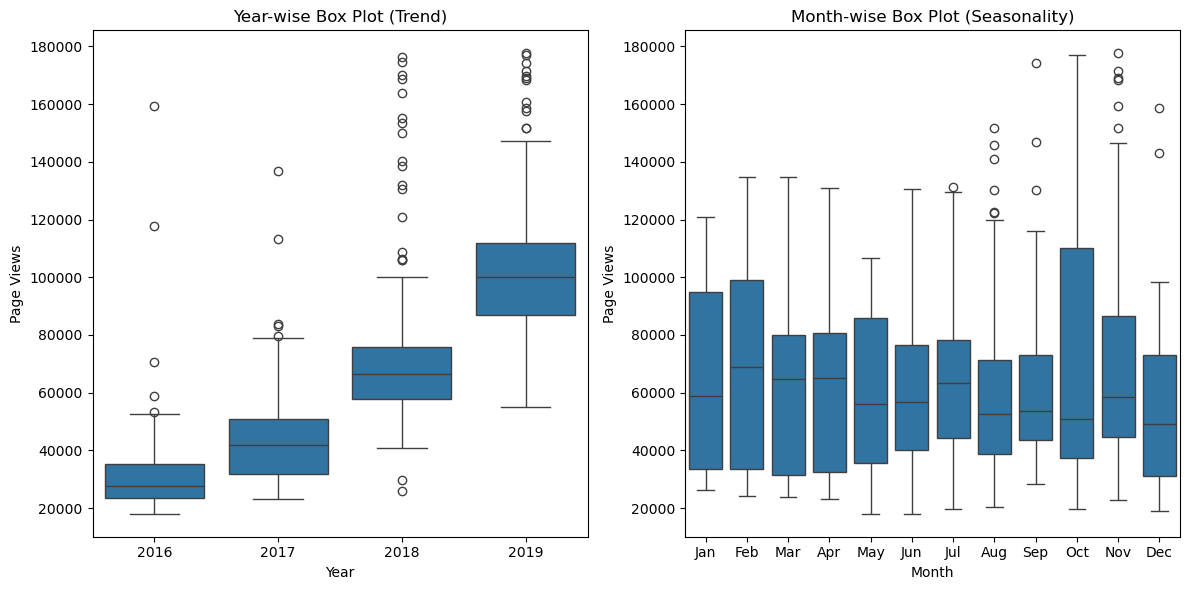

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("fcc-forum-pageviews.csv", index_col='date', parse_dates=True)

# Clean the data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['value'], color='blue')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('line_plot.png')
    plt.show()

def draw_bar_plot():
    # Create a new DataFrame for the bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month

    # Group the data by year and month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    df_bar.plot(kind='bar', ax=plt.gca())
    plt.title('Average Daily Page Views per Month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.tight_layout()
    plt.savefig('bar_plot.png')
    plt.show()

def draw_box_plot():
    # Create new columns for year and month
    df['year'] = df.index.year
    df['month'] = df.index.month

    # Map numerical month to month names
    month_mapping = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
        5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
        9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }
    df['month'] = df['month'].map(month_mapping)

    plt.figure(figsize=(12, 6))

    # Year-wise Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='year', y='value', data=df)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')

    # Month-wise Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='month', y='value', data=df, order=list(month_mapping.values()))
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')

    plt.tight_layout()
    plt.savefig('box_plot.png')
    plt.show()

# Call the functions to draw the plots
draw_line_plot()
draw_bar_plot()
draw_box_plot()
